In [1]:
%load_ext rpy2.ipython

In [56]:
%%R
library(phyloseq)
library(dplyr); library(tidyr)
library(ggplot2)
library(RColorBrewer)

In [24]:
%%R
physeq = import_biom("../data/otu_table_tax_no211_meta.biom", parseFunction=parse_taxonomy_greengenes)

In [25]:
%%R
tax_table(physeq)

Taxonomy Table:     [7770 taxa by 8 taxonomic ranks]:
         Kingdom    Phylum             Class                  
OTU.43   "Bacteria" "Nitrospirae"      "Nitrospira"           
OTU.2    "Bacteria" "Proteobacteria"   "Alphaproteobacteria"  
OTU.187  "Bacteria" "Acidobacteria"    "Acidobacteriia"       
OTU.150  "Bacteria" "Proteobacteria"   "Alphaproteobacteria"  
OTU.91   "Bacteria" "Bacteroidetes"    "Flavobacteriia"       
OTU.305  "Bacteria" "Chloroflexi"      "Thermomicrobia"       
OTU.25   "Bacteria" "Chloroflexi"      "Ktedonobacteria"      
OTU.4258 "Bacteria" "Acidobacteria"    "Acidobacteria-6"      
OTU.453  "Bacteria" "Proteobacteria"   "Deltaproteobacteria"  
OTU.599  "Bacteria" "Proteobacteria"   "Betaproteobacteria"   
OTU.82   "Bacteria" "Proteobacteria"   "Alphaproteobacteria"  
OTU.478  "Bacteria" "Acidobacteria"    "Sva0725"              
OTU.67   "Bacteria" "Proteobacteria"   "Alphaproteobacteria"  
OTU.7041 "Bacteria" "Proteobacteria"   "Alphaproteobacteria"  
O

In [26]:
%%R
mdf = psmelt(physeq)

In [105]:
%%R
d = d.plot %>%
    group_by(Phylum) %>%
    summarize(Abundance = sum(Abundance))
Porder = d$Phylum[order(-d$Abundance)]
Porder

 [1] Proteobacteria   Acidobacteria    Actinobacteria   Bacteroidetes   
 [5] Planctomycetes   Verrucomicrobia  Chloroflexi      Gemmatimonadetes
 [9] Firmicutes       <NA>             Nitrospirae      Armatimonadetes 
[13] WS3             
12 Levels: Proteobacteria Acidobacteria Actinobacteria ... WS3


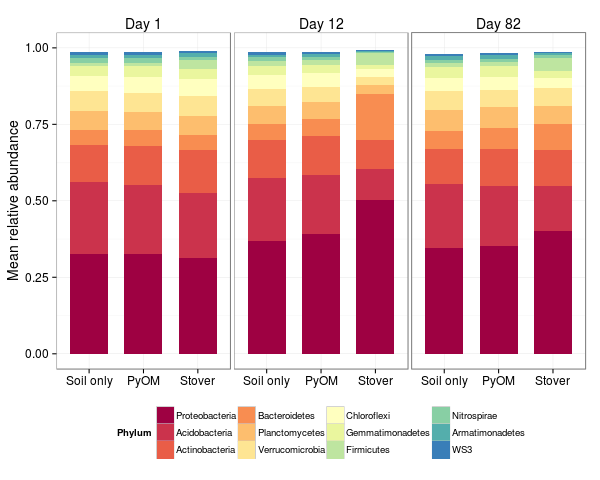

In [106]:
%%R -w 600
cutoff = 0.00
d.plot = mdf %>%
    group_by(DayAmdmt) %>%
    mutate(Abundance = Abundance / sum(Abundance)) %>%
    group_by(Phylum, Amdmt, Day, DayAmdmt) %>%
    summarize(Abundance = sum(Abundance)) %>%
    filter(Abundance > cutoff) %>%
    arrange(Day,Amdmt,Abundance)

d.plot$Phylum = factor(d.plot$Phylum, levels = Porder)
d.plot = d.plot[with(d.plot, order(d.plot$Phylum)),]
d.plot$Day = ifelse(d.plot$Day==1,"Day 12",ifelse(d.plot$Day==2,"Day 82","Day 1"))
d.plot$Amdmt = ifelse(d.plot$Amdmt==1,"PyOM",ifelse(d.plot$Amdmt==2,"Stover","Soil only"))
d.plot$Amdmt = factor(d.plot$Amdmt, levels = c("Soil only", "PyOM", "Stover"))

p = ggplot(d.plot, aes(x = Amdmt, y = Abundance, fill = Phylum))

p = p + facet_grid(. ~ Day, scales = "free_x", space = "free")

p = p + geom_bar(stat = "identity", width = 0.70)

colourCount = length(unique(d.plot$Phylum))
getPalette = colorRampPalette(brewer.pal(14, "Spectral"))
p = p + scale_fill_manual(values=getPalette(colourCount))

p = p + theme_bw()

p = p + guides(fill = guide_legend(ncol = 4))
p = p + theme(legend.position = "bottom")

p = p + theme(strip.text.x = element_text(size=14), 
                strip.background = element_rect(colour="white", fill="white"))

p = p + theme(axis.text = element_text(size = 12))
p = p + theme(axis.title.x = element_blank())
p = p + theme(axis.title.y = element_text(size = 14, vjust = 1))

p = p + labs(x="Amendment",y="Mean relative abundance")

ggsave(filename = "StackedBar.pdf", plot = p, width=6.8, height = 4.5)

p